In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [3]:
# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Flatten the images
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [5]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 11s 8ms/step - loss: 0.2777 - accuracy: 0.9213 - val_loss: 0.1362 - val_accuracy: 0.9581
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1153 - accuracy: 0.9658 - val_loss: 0.1089 - val_accuracy: 0.9643
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0782 - accuracy: 0.9762 - val_loss: 0.0930 - val_accuracy: 0.9713
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0990 - val_accuracy: 0.9695
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0826 - val_accuracy: 0.9750


In [9]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


In [10]:
# Make predictions
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


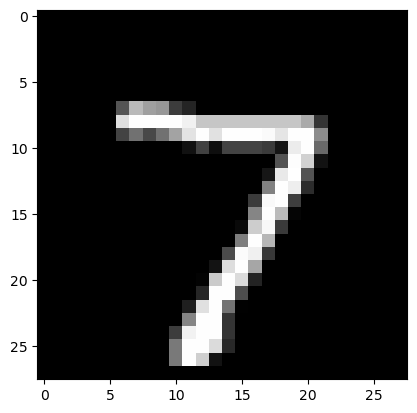

Predicted: 7


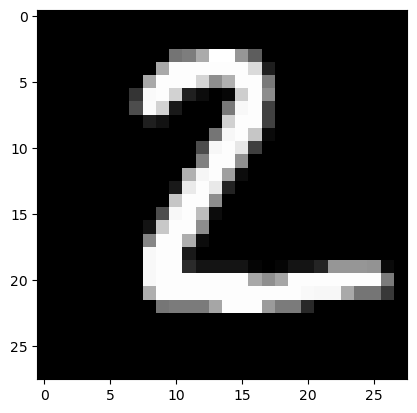

Predicted: 2


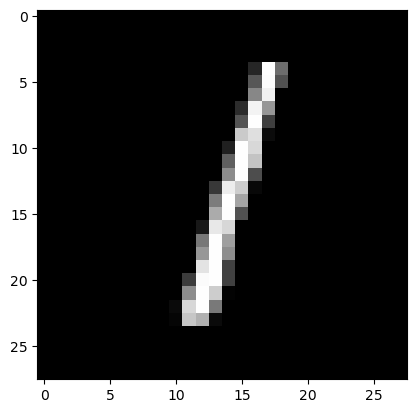

Predicted: 1


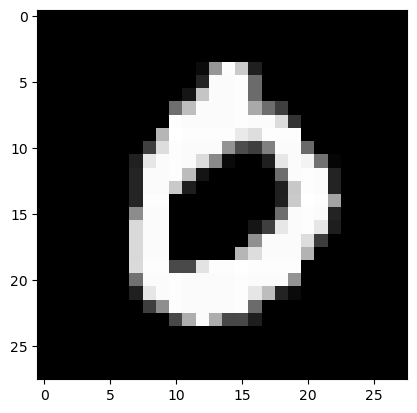

Predicted: 0


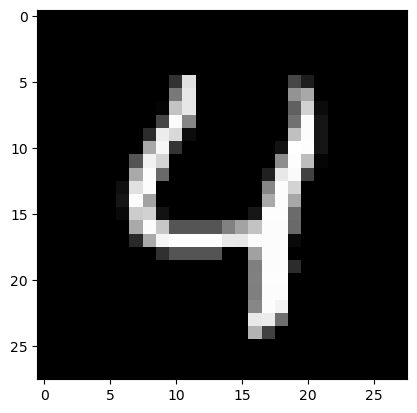

Predicted: 4


In [11]:
# Display a few test images and their predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.show()
    print("Predicted:", np.argmax(predictions[i]))